In [ ]:
# 1) Sign in to Colab and click "New notebook".
# 2) (Optional) Runtime > Change runtime type > Hardware accelerator: GPU > Save.
# 3) Install required libraries in a cell:
!pip install numpy pandas matplotlib scikit-learn pillow tensorflow torch torchvision torchaudio

# 4) Verify key imports and (if enabled) GPU access:
import numpy as np, tensorflow as tf, torch
print("NumPy:", np.__version__)
print("TF GPUs:", tf.config.list_physical_devices('GPU'))
print("Torch CUDA:", torch.cuda.is_available())

NumPy: 2.0.2
TF GPUs: []
Torch CUDA: False


In [ ]:
#Define a simple neural network model
import keras
from keras import layers
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28),),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
]
)


In [ ]:
#Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
somary = model.summary()
print(somary)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#Load and preprocess the dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
val_images, val_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

# Flatten 28x28 images to 784-dimensional vectors and normalize to [0, 1]
train_images = train_images.reshape((-1,28,28),).astype('float32') / 255
test_images = test_images.reshape((-1,28,28)).astype('float32') / 255
val_images = val_images.reshape((-1,28,28)).astype('float32') / 255

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
#train the model
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9249 - loss: 0.8369 - val_accuracy: 0.9440 - val_loss: 0.2068
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9487 - loss: 0.1890 - val_accuracy: 0.9630 - val_loss: 0.1345
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9666 - loss: 0.1195 - val_accuracy: 0.9718 - val_loss: 0.0968
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9785 - loss: 0.0765 - val_accuracy: 0.9776 - val_loss: 0.0766
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9806 - val_loss: 0.0673
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9877 - loss: 0.0387 - val_accuracy: 0.9772 - val_loss: 0.0725
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9788 - val_loss: 0.0752
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9923 - loss: 0

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

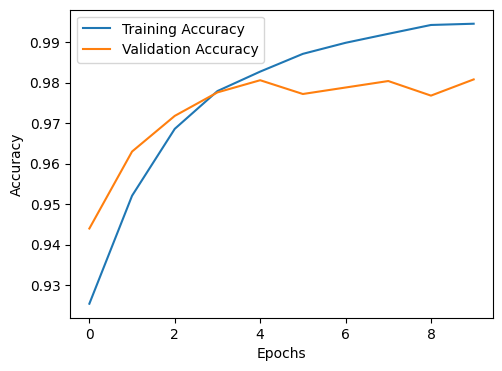

In [ ]:
##Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

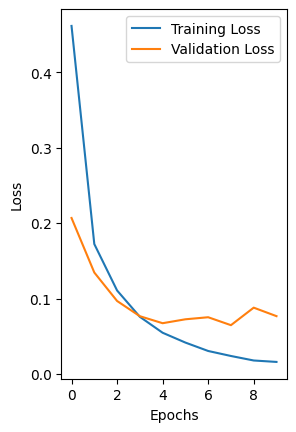

In [ ]:
#Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
#Display test loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0877
Test accuracy: 0.9800000190734863
Test loss: 0.07582227885723114
